# Will a player get drafted ? A comparative analysis of Machine Learning model

### Table Of Content

1. Exploratory Data Analysis
2. Feature engineering to select the relevant subsets
3. Pre-processing
4. Evaluate the model
5. Hyperparameter fine tuning

# 1. Initial Data Analysis and Data Cleaning

We import the relevant package before starting our analysis.

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

Importing the data

In [309]:
df = pd.read_csv('/Users/gregorycrooks/Downloads/NFL.csv')

In [310]:
df.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


We find a total of 18 columns

In [311]:
len(df.columns)

18

Looking at the column types, we find:
1. <b> 11 Numerical columns </b>: Year, Age, Height, Weight, Sprint_40yd, Vertical_Jump, Bench_Press_Reps, Broad_Jump, Agility_3cone, Shuttle, BMI </br>

2. <b>7 Categorical columns </b>: Player, School, Drafted..tm.rnd.yr., Player_Type, Position_Type, Position, Drafted

In [312]:
df.dtypes

Year                     int64
Player                  object
Age                    float64
School                  object
Height                 float64
Weight                 float64
Sprint_40yd            float64
Vertical_Jump          float64
Bench_Press_Reps       float64
Broad_Jump             float64
Agility_3cone          float64
Shuttle                float64
Drafted..tm.rnd.yr.     object
BMI                    float64
Player_Type             object
Position_Type           object
Position                object
Drafted                 object
dtype: object

<b> Identifying Null values </b>

We find that some columns have a high percentage of null values. At the <b>highest</b>, 35% of the "Drafted..tm.rnd.yr." column has 35% null values. Similarly, we find that most of the columns for performances in drills tend to have a higher percentage of null values.

In [313]:
(df.isnull().sum()/(len(df)))*100

Year                    0.000000
Player                  0.000000
Age                    15.818234
School                  0.000000
Height                  0.000000
Weight                  0.000000
Sprint_40yd             5.004314
Vertical_Jump          20.046017
Bench_Press_Reps       26.028185
Broad_Jump             20.937590
Agility_3cone          35.001438
Shuttle                32.786885
Drafted..tm.rnd.yr.    35.174001
BMI                     0.000000
Player_Type             0.000000
Position_Type           0.000000
Position                0.000000
Drafted                 0.000000
dtype: float64

# 2. Data Cleaning

### Formatting Errors

The <b> "Drafted..tm.rnd.yr." </b> contains information about the drafting team, round, pick rank, and year. Each value, if not null, has the following format: Arizona Cardinals / 1st / 31st pick / 2009. We clean this by separating this into 4 columns based on the "/" delimiter.

In [314]:
df[['Team','Round', "Pick", "Year"]] = df['Drafted..tm.rnd.yr.'].str.split('/',expand=True)

# Function to ensure only one space between words in each column
def normalize_spaces(s):
    if pd.isna(s):
        return s
    return ' '.join(s.split())

# Apply the function to each of the new columns
df['Team'] = df['Team'].apply(normalize_spaces)
df['Round'] = df['Round'].apply(normalize_spaces)
df['Pick'] = df['Pick'].apply(normalize_spaces)
df['Year'] = df['Year'].apply(normalize_spaces)

df = df.drop(columns=["Drafted..tm.rnd.yr."]) 

# Display the first few rows to verify the result
df[['Team', 'Round', 'Pick', 'Year']].head()

,Team,Round,Pick,Year
0,Arizona Cardinals,1st,31st pick,2009
1,Arizona Cardinals,6th,204th pick,2009
2,Arizona Cardinals,5th,167th pick,2009
3,Arizona Cardinals,3rd,95th pick,2009
4,Arizona Cardinals,2nd,63rd pick,2009


The <b> Round and Pick</b> columns are numerical and might provide relevant information. Let's remove all letters and convert them to numerical values:

In [315]:
import re
def omit_letters(s):
    if pd.isna(s):
        return s
    return re.sub('[^0-9]','', s)
df['Round'] = df['Round'].apply(omit_letters)
df['Pick'] = df['Pick'].apply(omit_letters)
df['Pick'] = df['Pick'].astype(float).astype('Int64')
df['Round'] = df['Round'].astype(float).astype('Int64')

The <b> "Player" </b> column values are occasionaly formatted with the player name followed by "\", and what looks to be a Username: "Beanie Wells\WellCh00". To resolve this, we remove "\" and any set of string after.

In [316]:
def normalize_spaces(s):
    if pd.isna(s):
        return s
    return ' '.join(s.split())

# Step 3: Apply the function to the 'Player' column to normalize spaces
df['Player'] = df['Player'].apply(normalize_spaces)

df['Player'] = df['Player'].str.split('\\').str[0]
df['Player'].head()

0      Beanie Wells
1        Will Davis
2    Herman Johnson
3    Rashad Johnson
4        Cody Brown
Name: Player, dtype: object

For the sake of better visualization, we have each first letter of the <b> Player Type</b> column in upper case format

In [317]:
df['Player_Type'] = df['Player_Type'].str.title()

df['Player_Type'].head()

0    Offense
1    Defense
2    Offense
3    Defense
4    Defense
Name: Player_Type, dtype: object

Likewise, values in the <b> "Position_Types" </b> column are oddly formatted. Let's replace them with improved formatting:

In [318]:
df["Position_Type"].value_counts()

backs_receivers       1260
defensive_back         657
offensive_lineman      555
defensive_lineman      501
line_backer            380
kicking_specialist     111
other_special           13
Name: Position_Type, dtype: int64

In [319]:
# Define the mapping dictionary
position_mapping = {
    "backs_receivers": "Backs/Receivers",
    "defensive_back": "Defensive Back",
    "offensive_lineman": "Offensive Lineman",
    "defensive_lineman": "Defensive Lineman",
    "line_backer": "Linebacker",
    "kicking_specialist": "Kicking Specialist",
    "other_special": "Other Special"
}

# Apply the mapping to the Position_Type column
df["Position_Type"] = df["Position_Type"].replace(position_mapping)
df["Position_Type"].head()

0      Backs/Receivers
1    Defensive Lineman
2    Offensive Lineman
3       Defensive Back
4           Linebacker
Name: Position_Type, dtype: object

<b> The "Drafted column has NAs for players with aren't drafted </b>

In [366]:
df['Team'] = df['Team'].fillna("Not Drafted")

<b> Let's drop irrelevant columns:

In [320]:
df = df.drop(columns=["Pick", "Year", "Round"])

### Dealing with Null Values

We found earlier in our analysis that the variables with the highest percentage of null values are numerical, specifically those related to athletic performance such as: <b> 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone',
       'Shuttle' </b>

Looking at the relationship between numerical values, we notice that weight heavily correlates with a longer shuttle:

In [321]:
# Step 1: Identify highly correlated columns
correlation_matrix = df.corr().abs()

# We want to find pairs with a correlation of 70% or more
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] >= 0.7]
high_corr_pairs.head(7)

,level_0,level_1,0
12,Height,Weight,0.709092
21,Weight,Height,0.709092
23,Weight,Sprint_40yd,0.847610
26,Weight,Broad_Jump,0.710599
27,Weight,Agility_3cone,0.819166
28,Weight,Shuttle,0.797817
29,Weight,BMI,0.938884


Despite shuttle missing 35% of its values, we are able to create weight classes and find the mean of each other variable for all other columns. To illustrate this, let's create a graph highlighting the mean shuttle for the different weight classes.

As highlighted by the graph: the strong relationship between shuttle time and weight is represented. The bigger the weight class, the higher the mean shuttle. The relevancy of this with regards to missing values is replacing missing values by the mean of the strata. For instanc, if a player is between 160 and 167kg, then we replace the null shuttle value with the 4.95 shuttle.

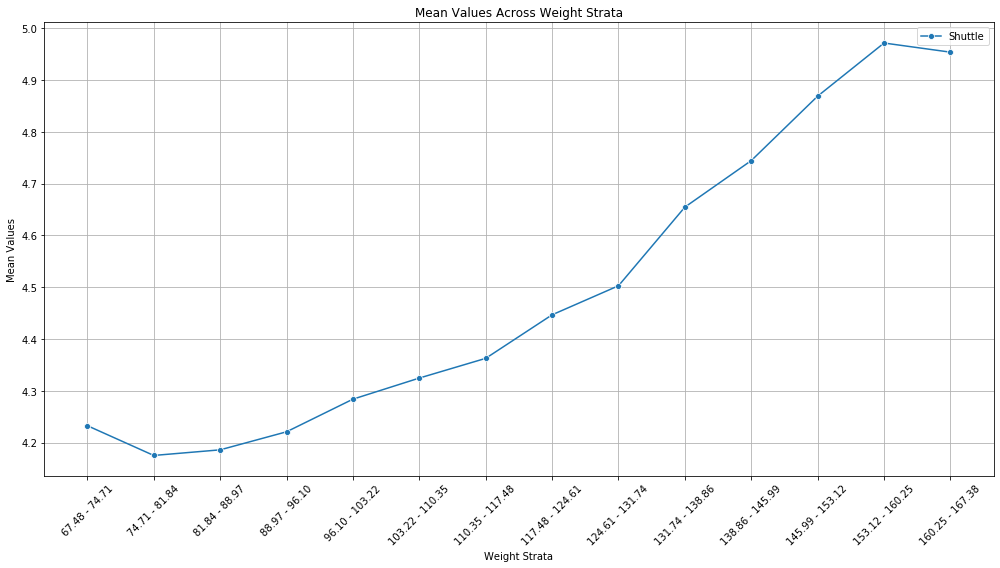

In [322]:
import seaborn as sns
plt.figure(figsize=(14, 8))
df['Weight_Strat'] = pd.cut(df['Weight'], bins=14)
grouped_means = df.groupby(['Weight_Strat']).mean().reset_index()
grouped_means['Weight_Strat'] = grouped_means['Weight_Strat'].apply(lambda x: f'{x.left:.2f} - {x.right:.2f}')
grouped_means["Weight_Strat"] = grouped_means["Weight_Strat"].astype(object)
sns.lineplot(data=grouped_means, x='Weight_Strat', y='Shuttle', label='Shuttle', marker='o')

# Formatting the plot
plt.xticks(rotation=45)
plt.xlabel('Weight Strata')
plt.ylabel('Mean Values')
plt.title('Mean Values Across Weight Strata')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

For better accuracy, let's first look, for each of the numerical variables, the other numerical variable with the highest correlation:

In [323]:
import pandas as pd

# Assuming 'df' is your DataFrame with numerical variables only
numerical_columns = ['Weight', 'Sprint_40yd', 'Broad_Jump', 'Agility_3cone', 'Vertical_Jump', 'Shuttle', 'BMI', 'Height']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Find the variable with the highest correlation for each variable
highest_correlation = {}
for col in correlation_matrix.columns:
    # Exclude self-correlation by setting it to NaN
    correlation_matrix.loc[col, col] = np.nan
    # Find the maximum correlation value and its corresponding variable
    max_corr_value = correlation_matrix[col].max()
    max_corr_var = correlation_matrix[col].idxmax()
    highest_correlation[col] = (max_corr_var, max_corr_value)

# Convert the result to a DataFrame for better visualization
highest_correlation_df = pd.DataFrame(highest_correlation, index=['Most Correlated Variable', 'Correlation Coefficient']).T

highest_correlation_df

,Most Correlated Variable,Correlation Coefficient
Weight,BMI,0.938884
Sprint_40yd,Weight,0.84761
Broad_Jump,Vertical_Jump,0.828687
Agility_3cone,Shuttle,0.880689
Vertical_Jump,Broad_Jump,0.828687
Shuttle,Agility_3cone,0.880689
BMI,Weight,0.938884
Height,Weight,0.709092


Let's illustrate the correlations:

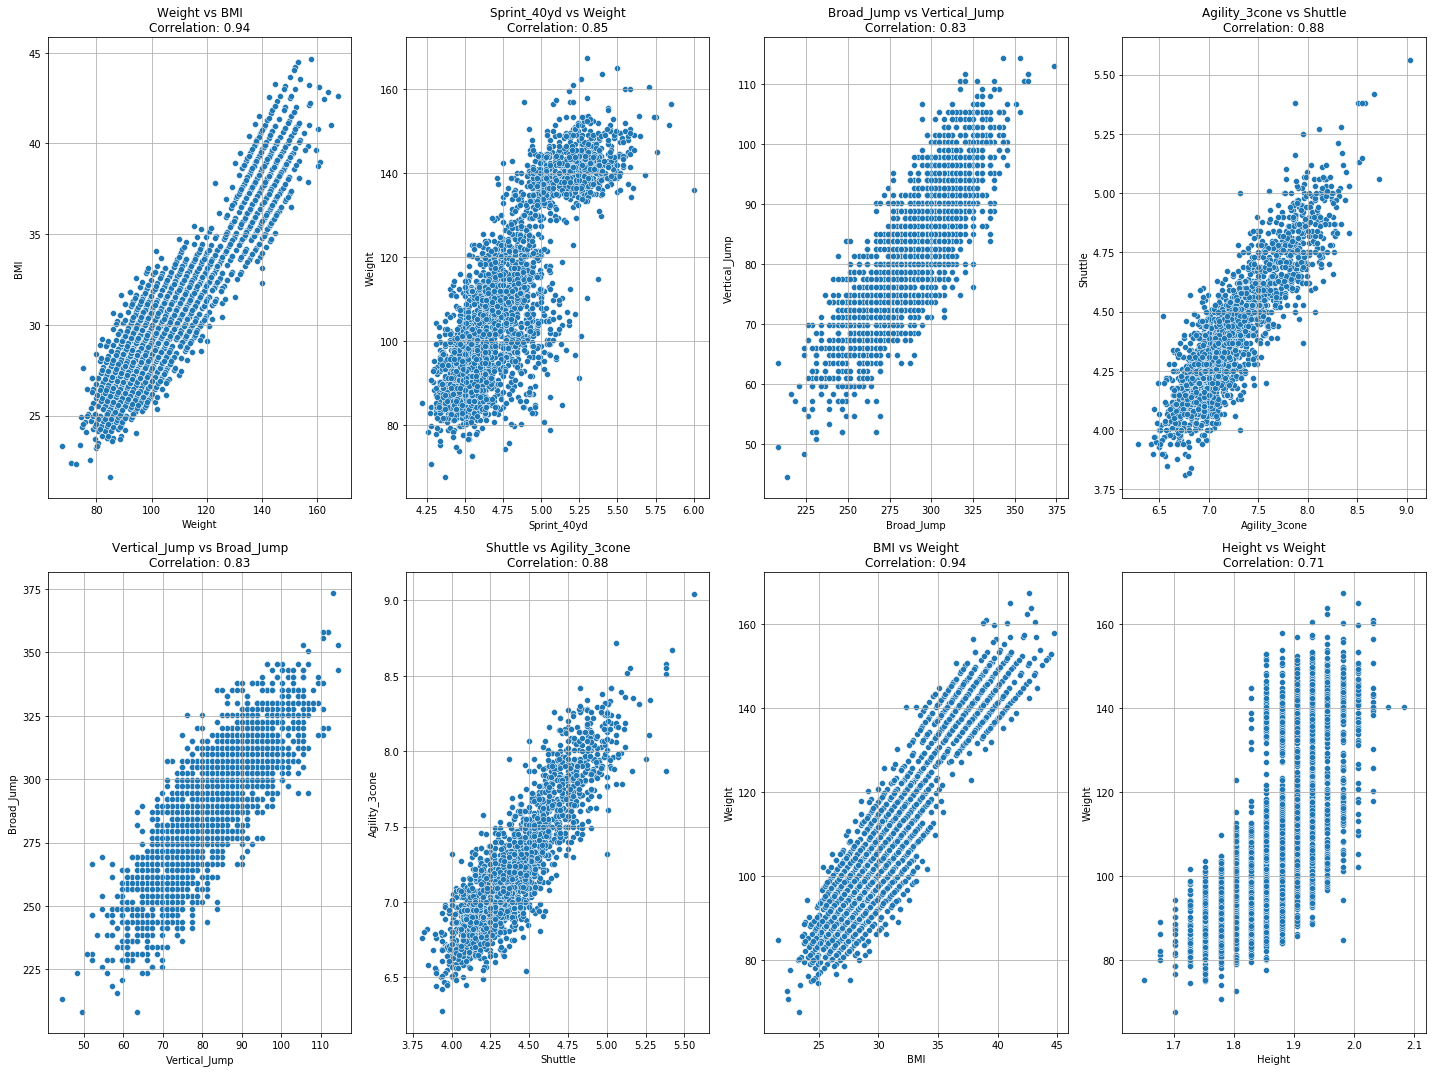

In [324]:
# Create a grid of plots (4 plots per row)
num_vars = len(highest_correlation_df)
fig, axes = plt.subplots((num_vars + 3) // 4, 4, figsize=(20, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plotting each pair
for i, (var, row) in enumerate(highest_correlation_df.iterrows()):
    most_corr_var = row['Most Correlated Variable']
    sns.scatterplot(data=df, x=var, y=most_corr_var, ax=axes[i])
    axes[i].set_title(f'{var} vs {most_corr_var}\nCorrelation: {row["Correlation Coefficient"]:.2f}')
    axes[i].grid(True)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We find a similar pattern for each correlated variable.

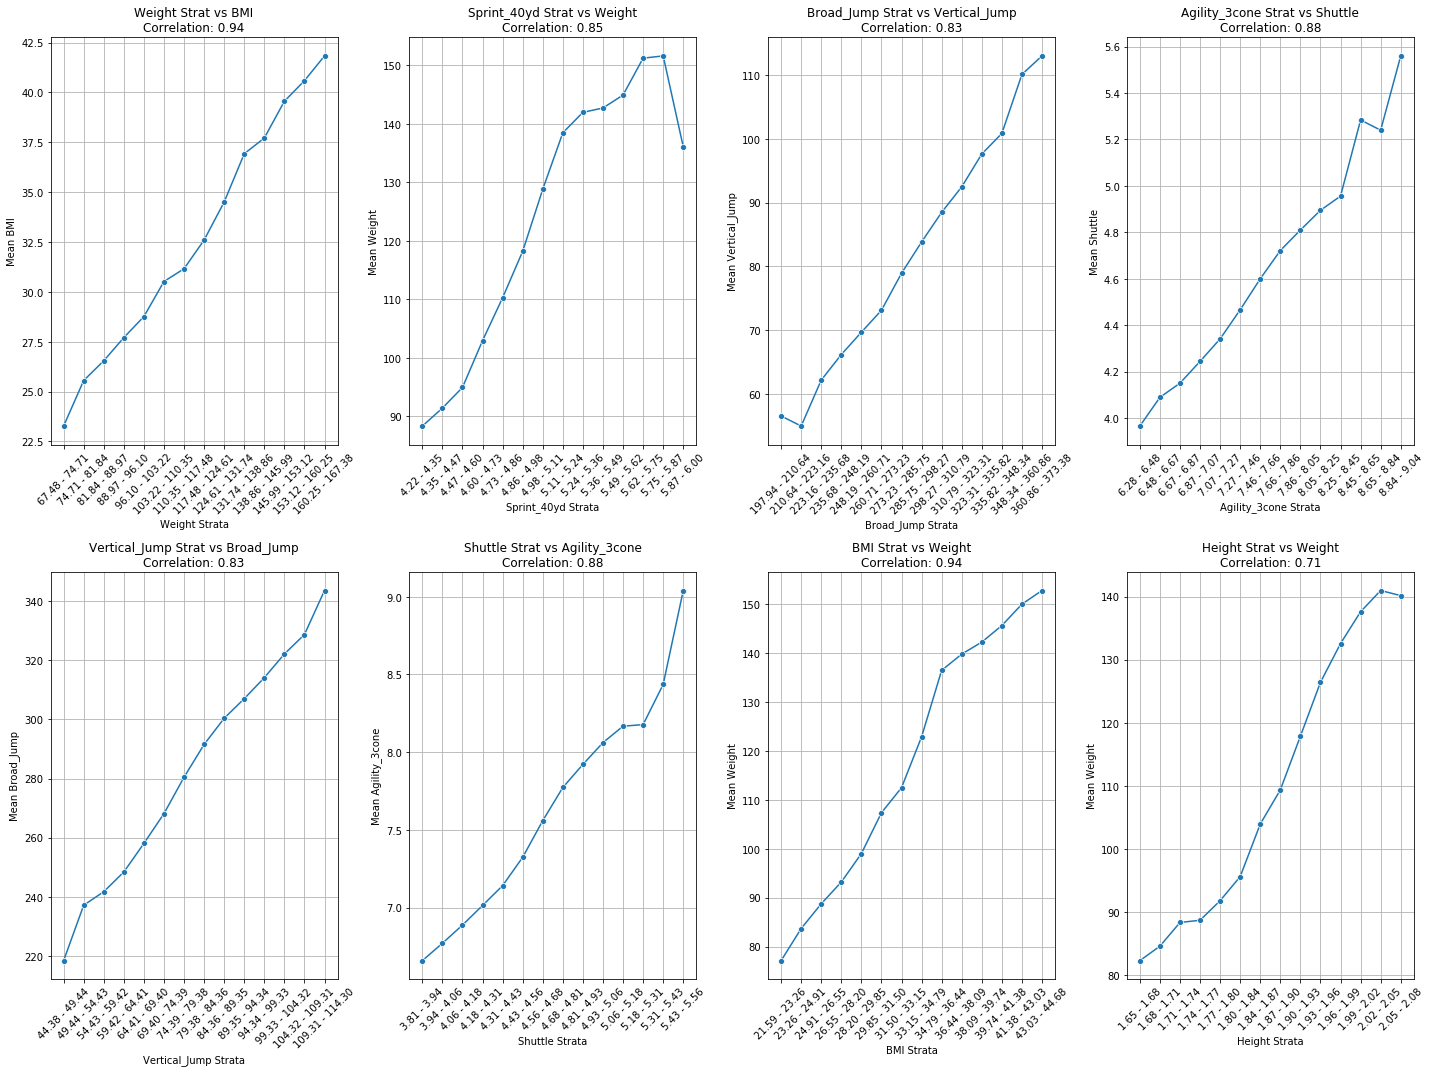

In [325]:
# Convert the result to a DataFrame
highest_correlation_df = pd.DataFrame(highest_correlation, index=['Most Correlated Variable', 'Correlation Coefficient']).T

# Create a grid of plots (4 plots per row)
num_vars = len(highest_correlation_df)
fig, axes = plt.subplots((num_vars + 3) // 4, 4, figsize=(20, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plotting each pair with strata for the x-axis variable
for i, (var, row) in enumerate(highest_correlation_df.iterrows()):
    most_corr_var = row['Most Correlated Variable']
    
    # Create strata for the x-axis variable
    df[f'{var}_Strat'] = pd.cut(df[var], bins=14)
    
    # Group by the strata and calculate the mean for the y-axis variable
    grouped_means = df.groupby([f'{var}_Strat'])[most_corr_var].mean().reset_index()
    
    # Convert strata to string format for plotting
    grouped_means[f'{var}_Strat'] = grouped_means[f'{var}_Strat'].apply(lambda x: f'{x.left:.2f} - {x.right:.2f}')
    grouped_means[f'{var}_Strat'] = grouped_means[f'{var}_Strat'].astype(object)
    
    # Line plot
    sns.lineplot(data=grouped_means, x=f'{var}_Strat', y=most_corr_var, ax=axes[i], marker='o')
    axes[i].set_title(f'{var} Strat vs {most_corr_var}\nCorrelation: {row["Correlation Coefficient"]:.2f}')
    axes[i].set_xlabel(f'{var} Strata')
    axes[i].set_ylabel(f'Mean {most_corr_var}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

To replace missing values, let's use linear regression:

In [368]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#Remove strats
df = df[[x for x in df if not x.endswith('_Strat')]]    
# Step 1: Identify highly correlated columns
correlation_matrix = df.corr().abs()

# We want to find pairs with a correlation of 70% or more
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] >= 0.7]

# Step 2: Function to predict and fill missing values using multiple explanatory variables
def fill_missing_values_multivariable(df, col_to_fill, explanatory_vars):
    # Separate the data into those with and without missing values
    non_null_df = df[df[col_to_fill].notnull()]
    null_df = df[df[col_to_fill].isnull()]
    
    # If there's no missing value, return the column as is
    if null_df.empty:
        return df[col_to_fill]
    
    # Ensure that we only use explanatory variables that are not null
    explanatory_vars = [var for var in explanatory_vars if var in df.columns and df[var].isnull().sum() == 0]
    
    # Train a linear regression model on non-null data
    X_train = non_null_df[explanatory_vars]
    y_train = non_null_df[col_to_fill]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the missing values
    X_predict = null_df[explanatory_vars]
    y_predict = model.predict(X_predict)
    
    # Fill the missing values with the predictions
    df.loc[df[col_to_fill].isnull(), col_to_fill] = y_predict
    
    return df[col_to_fill]

# Step 3: Apply the model to fill missing values for each column
columns_to_predict = ['Shuttle', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone',]

for col in columns_to_predict:
    explanatory_vars = [c for c in columns_to_predict if c != col]
    df[col] = fill_missing_values_multivariable(df, col, explanatory_vars)

# Display the DataFrame after filling missing values
df

,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Player_Type,Position_Type,Position,Drafted,Team
0,Beanie Wells,20.0,Ohio St.,1.8542,106.594207,4.380000,85.090000,25.00000,325.120000,7.083763,4.358944,31.004194,Offense,Backs/Receivers,RB,Yes,Arizona Cardinals
1,Will Davis,22.0,Illinois,1.8796,118.387609,4.840000,83.820000,27.00000,292.100000,7.380000,4.450000,33.510073,Defense,Defensive Lineman,DE,Yes,Arizona Cardinals
2,Herman Johnson,24.0,LSU,2.0066,165.107623,5.500000,63.893789,21.00000,243.153925,8.122168,4.949310,41.005821,Offense,Offensive Lineman,OG,Yes,Arizona Cardinals
3,Rashad Johnson,23.0,Alabama,1.8034,92.079251,4.490000,93.980000,15.00000,304.800000,7.090000,4.230000,28.312463,Defense,Defensive Back,FS,Yes,Arizona Cardinals
4,Cody Brown,22.0,Connecticut,1.8796,110.676538,4.760000,92.710000,26.00000,304.800000,7.100000,4.400000,31.327425,Defense,Linebacker,OLB,Yes,Arizona Cardinals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,Xavier Crawford,NaN,Central Michigan,1.8034,84.821773,4.480000,95.250000,11.00000,313.882728,6.832931,4.137911,26.080939,Defense,Defensive Back,CB,No,Not Drafted
3473,Jordan Brown,NaN,South Dakota St.,1.8288,91.172066,4.510000,100.330000,13.00000,325.120000,6.908023,4.199939,27.260221,Defense,Defensive Back,CB,No,Not Drafted
3474,Corey Ballentine,NaN,Washburn,1.8034,88.904105,4.470000,100.330000,15.00000,342.900000,6.820000,4.140000,27.336171,Defense,Defensive Back,CB,No,Not Drafted
3475,Ugo Amadi,NaN,Oregon,1.7526,90.264882,4.510000,82.550000,18.00000,292.100000,7.210000,4.190000,29.386861,Defense,Defensive Back,S,No,Not Drafted


Can we now use a regression model to predict the Team?

In [327]:
# Print out the columns in the DataFrame to check
print("Columns in DataFrame:", df.columns)

# Correctly define feature columns
feature_cols = ['Shuttle', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Broad_Jump', 'Agility_3cone']

# Ensure that the feature columns exist in the DataFrame
missing_cols = [col for col in feature_cols if col not in df.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    #split dataset in features and target variable
    X = df[feature_cols]  # Features
y = df.Team # Target variable

Columns in DataFrame: Index(['Player', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone',
       'Shuttle', 'BMI', 'Player_Type', 'Position_Type', 'Position', 'Drafted',
       'Team'],
      dtype='object')


In [350]:
(df.isnull().sum()/(len(df)))*100

Player               0.000000
Age                 15.818234
School               0.000000
Height               0.000000
Weight               0.000000
Sprint_40yd          0.000000
Vertical_Jump        0.000000
Bench_Press_Reps     0.000000
Broad_Jump           0.000000
Agility_3cone        0.000000
Shuttle              0.000000
BMI                  0.000000
Player_Type          0.000000
Position_Type        0.000000
Position             0.000000
Drafted              0.000000
Team                35.174001
dtype: float64

# 3. Exploratory Data Analysis

### Summary Statistics: Drafted Players

We find that about 65% of the players get drafted.

In [369]:
perc_drafted = len(df[df["Drafted"] == "Yes"]) / len(df) * 100
print("Percentage of drafted players:", perc_drafted)

Percentage of drafted players: 64.82599942479149


<b> Summary statistics: identifying the schools with highest percentage of players drafted

Let's first find the proportion (in percentage) of players drafted agains players which are not by school

In [330]:
c = df.groupby(["School", "Drafted"]).size().unstack()
c[np.isnan(c)] = 0
c = c.divide(c.sum(1), axis=0)

How many schools have 100% of their players being drafted?

We find 47 schools with 100% of their players being drafted

In [331]:
filtered_df = c[c['No'] == 0.0].sum()
filtered_df

Drafted
No      0.0
Yes    47.0
dtype: float64

What about schools with 0% of their players being drafted ?

We find a total of 48 schools with 0% of their players not being drafted

In [332]:
filtered_df = c[c['Yes'] == 0.0].sum()
filtered_df

Drafted
No     48.0
Yes     0.0
dtype: float64

What about schools with a majority of their players being drafted?

We find that more schools present in our data have a majority of players being accepted to the draft: 145 schools with more than 50% of their prospects being drafted, and 82 having the most of their prospects being rejected from the draft. Most schools will have a successful draft

In [333]:
highlighted_df = c[c['Yes'] > c['No']]
highlighted_df

Drafted,No,Yes
School,,
Abilene Christian,0.000000,1.000000
Ala-Birmingham,0.000000,1.000000
Alabama,0.247525,0.752475
Appalachian St.,0.272727,0.727273
Arizona,0.235294,0.764706
...,...,...
West. Michigan,0.300000,0.700000
Western Kentucky,0.111111,0.888889
William & Mary,0.200000,0.800000


In [334]:
highlighted_df = c[c['Yes'] < c['No']]
highlighted_df

Drafted,No,Yes
School,,
Air Force,1.000000,0.000000
Alabama A&M,1.000000,0.000000
Alabama St.,1.000000,0.000000
Alcorn St.,1.000000,0.000000
Army,1.000000,0.000000
...,...,...
West Georgia,0.666667,0.333333
West Liberty,1.000000,0.000000
West Texas A&M,0.666667,0.333333


Which schools have the highest number of players drafted ? 

We find that Alabama university has the highest number of players drafted for that year, with more than 70.

While these figures give us an interesting idea of how a school might help a player entering the draft, let's identify the proportion for each of these top 5 establishments.

Have a higher number of players qualifying for the draft does highlight that there is a higher proportion of yes.
We do notice that LSU has a much higher proportion of players being rejected from the draft.

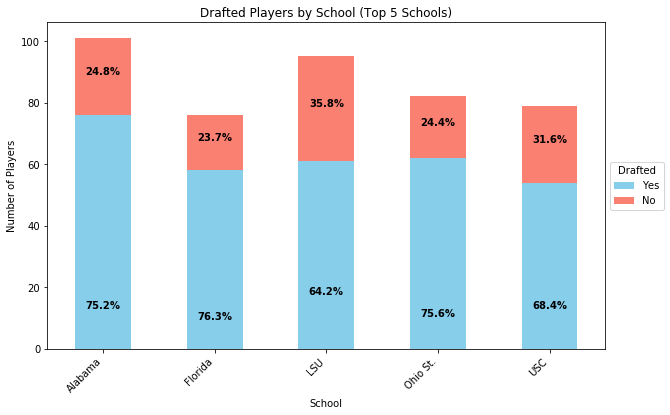

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'School' and 'Drafted' and get the count
Drafted_players_by_school = df.groupby(['School', 'Drafted']).size().reset_index(name='count')

# Get the top 5 schools based on the count of 'Yes'
top_schools = Drafted_players_by_school[
    Drafted_players_by_school['Drafted'] == 'Yes'
].sort_values(by='count', ascending=False)[:5]['School']

# Filter the original data to include only the top 5 schools
top_schools_data = Drafted_players_by_school[
    Drafted_players_by_school['School'].isin(top_schools)
]

# Pivot the data to have 'Yes' and 'No' in separate columns
pivot_data = top_schools_data.pivot(index='School', columns='Drafted', values='count').fillna(0)

# Calculate the proportion of Yes and No as a percentage
pivot_data['Total'] = pivot_data.sum(axis=1)
pivot_data['Yes%'] = (pivot_data['Yes'] / pivot_data['Total']) * 100
pivot_data['No%'] = (pivot_data['No'] / pivot_data['Total']) * 100

# Plotting
ax = pivot_data[['Yes', 'No']].plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))

plt.title('Drafted Players by School (Top 5 Schools)')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha="right")
# Move the legend outside the plot
plt.legend(title="Drafted", loc='center left', bbox_to_anchor=(1, 0.5))

# Add percentage annotations
for i in range(pivot_data.shape[0]):
    yes_percent = pivot_data.iloc[i]['No%']
    no_percent = pivot_data.iloc[i]['Yes%']
    plt.text(i, pivot_data.iloc[i]['Yes'] + pivot_data.iloc[i]['No'] / 2,
             f'{yes_percent:.1f}%', ha='center', va='bottom', color='black', weight='bold')
    plt.text(i, pivot_data.iloc[i]['No'] / 2,
             f'{no_percent:.1f}%', ha='center', va='bottom', color='black', weight='bold')

plt.show()


### <b> Teams with highest player stats </b>

In [370]:
# Group by 'Team' and calculate the mean for each metric
team_means = df.groupby("Team").mean()

# Find the team with the highest 'Vertical_Jump', 'Broad_Jump', and 'Bench_Press_Reps'
highest_vertical_jump_team = team_means['Vertical_Jump'].idxmax()
highest_broad_jump_team = team_means['Broad_Jump'].idxmax()
highest_bench_press_team = team_means['Bench_Press_Reps'].idxmax()

# Find the team with the lowest 'Shuttle' and 'Agility_3cone'
lowest_shuttle_team = team_means['Shuttle'].idxmin()
lowest_agility_3cone_team = team_means['Agility_3cone'].idxmin()

# Create a DataFrame to display the results
result = pd.DataFrame({
    'Metric': ['Vertical_Jump', 'Broad_Jump', 'Bench_Press_Reps', 'Shuttle', 'Agility_3cone'],
    'Team': [highest_vertical_jump_team, highest_broad_jump_team, highest_bench_press_team, lowest_shuttle_team, lowest_agility_3cone_team],
    'Value': [
        team_means['Vertical_Jump'].max(),
        team_means['Broad_Jump'].max(),
        team_means['Bench_Press_Reps'].max(),
        team_means['Shuttle'].min(),
        team_means['Agility_3cone'].min()
    ]
})

# Display the results
result

,Metric,Team,Value
0,Vertical_Jump,Dallas Cowboys,86.667345
1,Broad_Jump,Dallas Cowboys,297.780412
2,Bench_Press_Reps,San Diego Chargers,22.174697
3,Shuttle,Dallas Cowboys,4.318745
4,Agility_3cone,Philadelphia Eagles,7.105488


Average pick ran

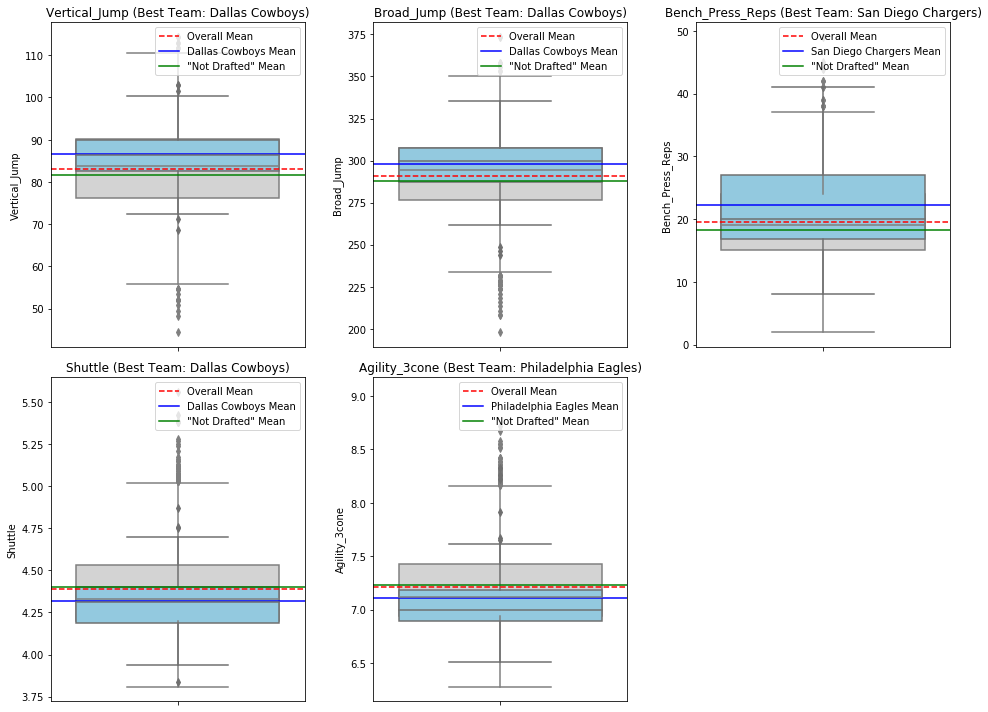

In [371]:
# Group by 'Team' and calculate the mean for each metric
team_means = df.groupby("Team").mean()

# Identify the teams with the highest/lowest performance for each metric
highest_vertical_jump_team = team_means['Vertical_Jump'].idxmax()
highest_broad_jump_team = team_means['Broad_Jump'].idxmax()
highest_bench_press_team = team_means['Bench_Press_Reps'].idxmax()
lowest_shuttle_team = team_means['Shuttle'].idxmin()
lowest_agility_3cone_team = team_means['Agility_3cone'].idxmin()

# Create a dictionary of the best teams for each metric
best_teams = {
    'Vertical_Jump': highest_vertical_jump_team,
    'Broad_Jump': highest_broad_jump_team,
    'Bench_Press_Reps': highest_bench_press_team,
    'Shuttle': lowest_shuttle_team,
    'Agility_3cone': lowest_agility_3cone_team
}

# Define the competencies/skills
competencies = ['Vertical_Jump', 'Broad_Jump', 'Bench_Press_Reps', 'Shuttle', 'Agility_3cone']

# Create boxplots for each competency with overall data and highlight the team with the highest/lowest average
plt.figure(figsize=(14, 10))
for i, skill in enumerate(competencies, 1):
    plt.subplot(2, 3, i)
    
    # Boxplot for the overall dataset
    sns.boxplot(y=df[skill], color='lightgrey')
    
    # Identify the team with the highest/lowest average for this skill
    best_team = best_teams[skill]
    best_team_data = df[df['Team'] == best_team]
    
    # Overlay the boxplot for the best team's data
    sns.boxplot(y=best_team_data[skill], color='skyblue')
    
    # Calculate and plot the overall mean
    overall_mean = df[skill].mean()
    plt.axhline(overall_mean, color='red', linestyle='--', label='Overall Mean')
    
    # Calculate and plot the best team's mean
    best_team_mean = best_team_data[skill].mean()
    plt.axhline(best_team_mean, color='blue', linestyle='-', label=f'{best_team} Mean')
    
    # Calculate and plot the mean for "Not Drafted" players
    not_drafted_mean = df[df['Team'] == 'Not Drafted'][skill].mean()
    plt.axhline(not_drafted_mean, color='green', linestyle='-', label='"Not Drafted" Mean')
    
    plt.title(f'{skill} (Best Team: {best_team})')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### <b> When do players usually get drafted? </b>

We find that 22 years old is the most common age for players to get drafted based on our data with 933 being drafted at that age against 285 being rejected from the draft. Interestingly, we find a much higher proportion of players being rejected than accepted at 23 years old, wih 218/487 being rejected. As expected the older a player is, the less likely the player is to get drafted

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


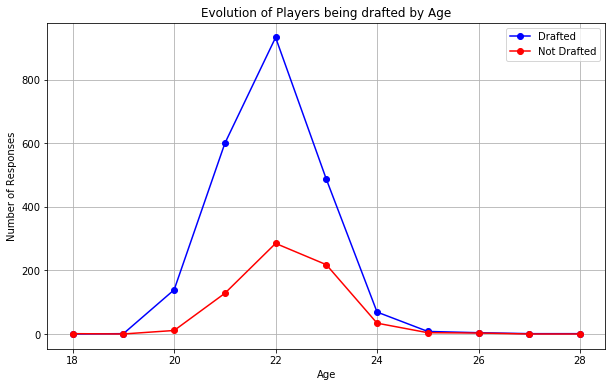

In [337]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'Age', 'Drafted', and possibly 'Gender' columns

# Grouping the data by age
age_groups = df.groupby(["Age"])

# Initialize lists to store the counts of 'Yes' and 'No' responses
yes_counts = []
no_counts = []

# Loop through each age group and count the 'Yes' and 'No' responses
for age, group in age_groups:
    yes_count = group["Drafted"].value_counts().get('Yes', 0)
    no_count = group["Drafted"].value_counts().get('No', 0)
    yes_counts.append((age, yes_count))
    no_counts.append((age, no_count))

# Convert to DataFrame for easy plotting
yes_df = pd.DataFrame(yes_counts, columns=['Age', 'Drafted'])
no_df = pd.DataFrame(no_counts, columns=['Age', 'Not Drafted'])

# Plotting the evolution of 'Yes' and 'No' responses
plt.figure(figsize=(10, 6))
plt.plot(yes_df['Age'], yes_df['Drafted'], marker='o', linestyle='-', color='blue', label='Drafted')
plt.plot(no_df['Age'], no_df['Not Drafted'], marker='o', linestyle='-', color='red', label='Not Drafted')
plt.title('Evolution of Players being drafted by Age')
plt.xlabel('Age')
plt.ylabel('Number of Responses')
plt.grid(True)
plt.legend()
plt.show()


While this show a general pattern of players being drafted by age, is the same for each position ?

By comparing each position, we find that the majority of players get drafted at 22 for most of positions. However, we do find that Running backs have a higher proportion of players drafted at 21. For QB, and P positions, the majority get drafted at 23 years old.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


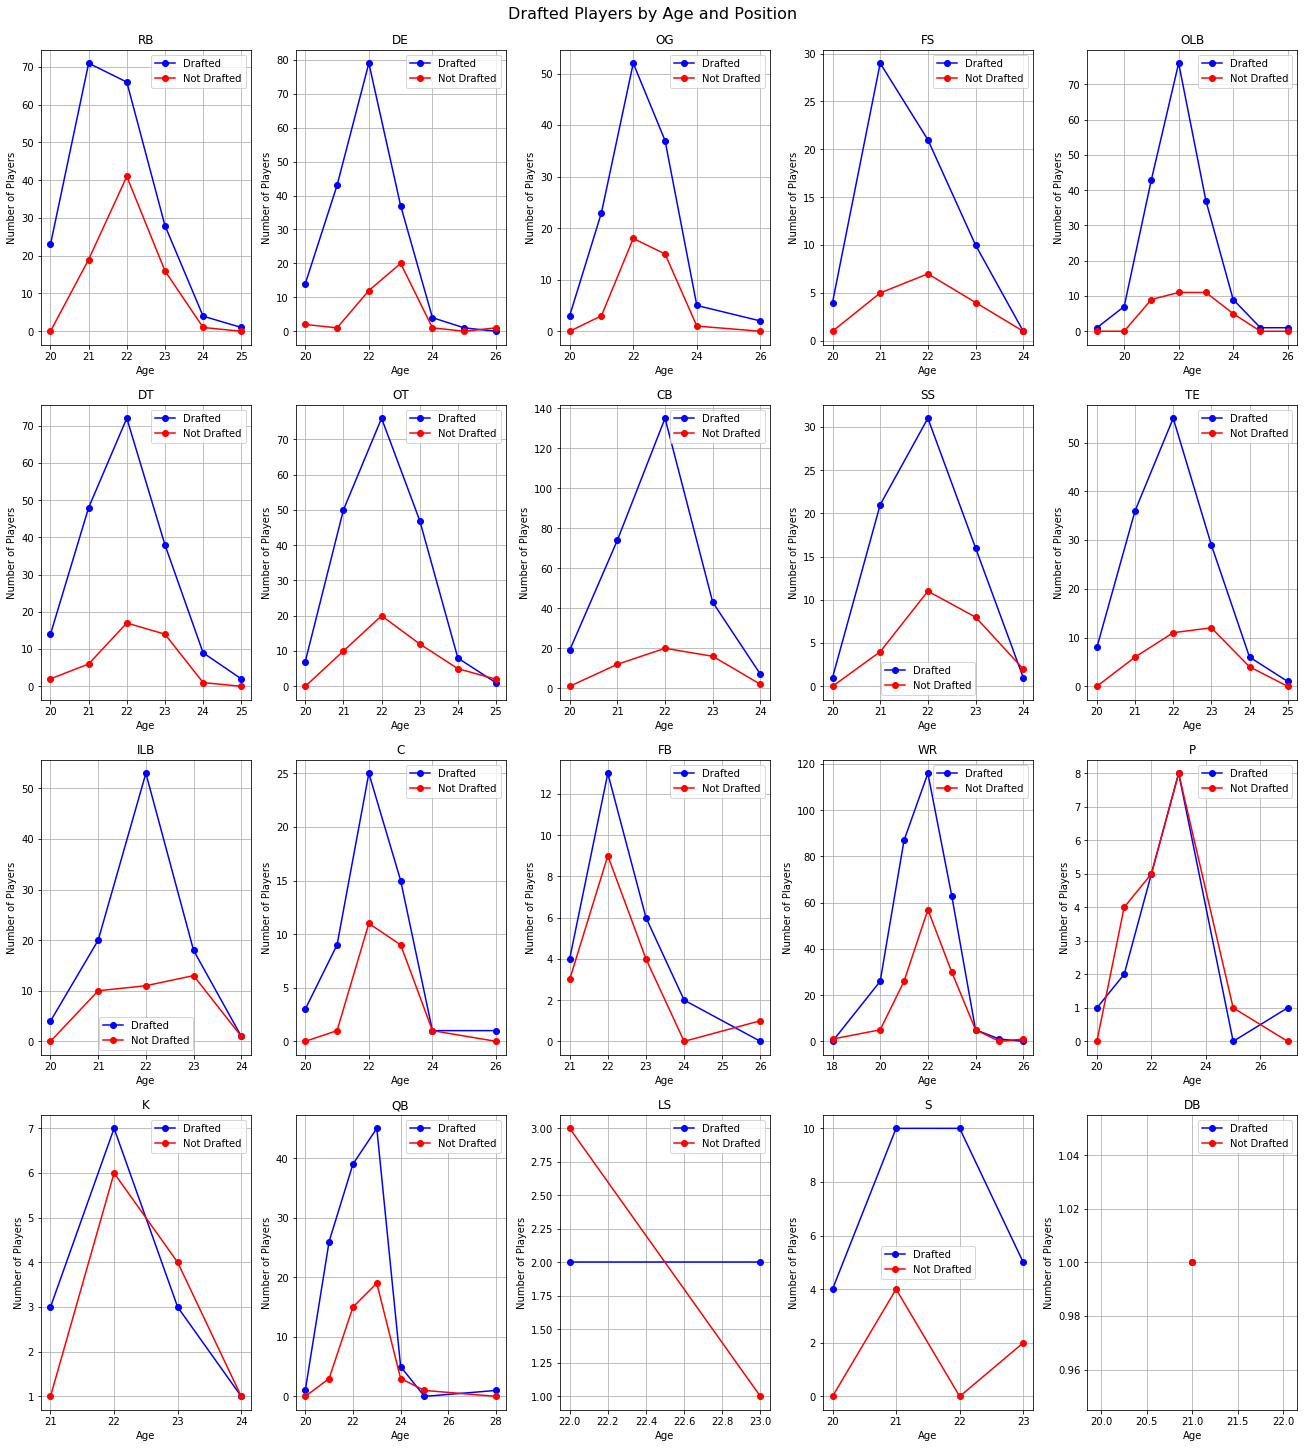

In [338]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Position, Age, and Drafted status
position_age_groups = df.groupby(["Position", "Age", "Drafted"]).size().unstack().fillna(0).reset_index()

# Unique positions and subplot layout
positions = df['Position'].unique()
n_cols = 5
n_rows = -(-len(positions) // n_cols)  # Ceiling division for rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

# Plot each position
for i, position in enumerate(positions):
    pos_data = position_age_groups[position_age_groups['Position'] == position]
    axes[i].plot(pos_data['Age'], pos_data.get('Yes', 0), marker='o', linestyle='-', color='blue', label='Drafted')
    axes[i].plot(pos_data['Age'], pos_data.get('No', 0), marker='o', linestyle='-', color='red', label='Not Drafted')
    axes[i].set_title(position)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Number of Players')
    axes[i].grid(True)
    axes[i].legend()

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Drafted Players by Age and Position', fontsize=16)
plt.show()


### <b> Outlier analysis: Do drafted players have more outliers than players who are not drafted? </b>

- Looking at the Boxplots side to side, we notice that each of the boxplots for drafted players tend to be slightly higher than non-drafted players, except for the 40 yard sprint. This is coherent, since drafted players will be better conditioned and therefore perform better. While the boxplots are about the same sizes in each performance measure, we do find that the boxplot for Weight for drafted player has a significantly higher interquartile range than non-drafted players.``
- In terms of outliers, Drafted players highlight a high number of outliers for bench press rep performance, bench pressing 40 to 50 reps.

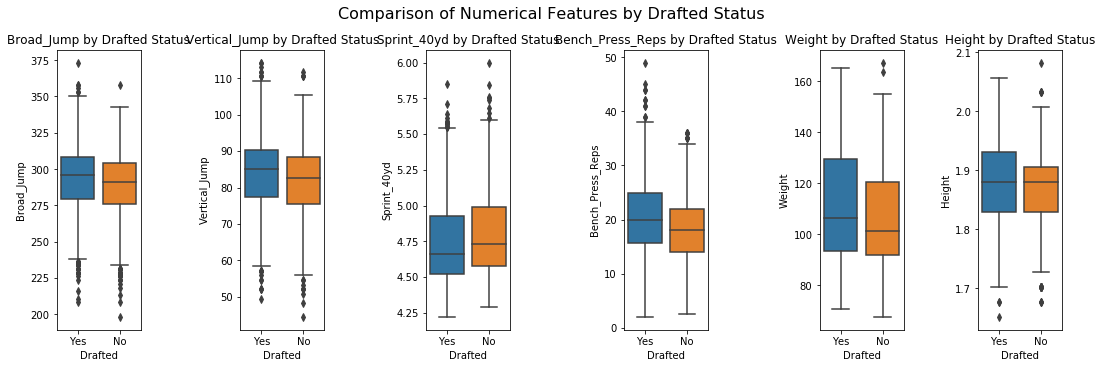

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has the numerical columns you want to plot
numerical_columns = ['Broad_Jump', 'Vertical_Jump', 'Sprint_40yd', 'Bench_Press_Reps', 'Weight', 'Height']

# Determine the number of rows and columns for subplots
n_cols = 6  # Number of columns in the subplot grid
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration if it's 2D
axes = axes.flatten()

# Create a boxplot for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x="Drafted", y=column, ax=axes[i])
    axes[i].set_title(f'{column} by Drafted Status')

# Remove empty subplots if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Comparison of Numerical Features by Drafted Status', fontsize=16)
plt.show()


### <b> Correlation Analysis: Which variables correlate? Are there any issues of collinearity within our data? </b>

In [340]:
# Select only numerical columns and the 'drafted' column
numerical_columns = df.select_dtypes(include='number')
selected_columns = numerical_columns.copy()

# Ensure 'drafted' is in the selected columns
if 'drafted' not in selected_columns.columns:
    selected_columns['Drafted'] = df['Drafted']
selected_columns = selected_columns.loc[:, ["Weight", "Vertical_Jump", "Drafted"]]

In [341]:
df["Agility_3cone"]

0       7.083763
1       7.380000
2       8.122168
3       7.090000
4       7.100000
          ...   
3472    6.832931
3473    6.908023
3474    6.820000
3475    7.210000
3476    6.959752
Name: Agility_3cone, Length: 3477, dtype: float64

In [342]:
df_corr = df.loc[:,[ "Age", "Weight", "Sprint_40yd", "Vertical_Jump", "Bench_Press_Reps", "Broad_Jump", "Agility_3cone", 'Shuttle', "BMI", "Drafted"]]



In [343]:
df.columns

Index(['Player', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone',
       'Shuttle', 'BMI', 'Player_Type', 'Position_Type', 'Position', 'Drafted',
       'Team'],
      dtype='object')

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is already populated with the necessary columns

# Separate the DataFrame based on Drafted status
df_drafted = df[df['Drafted'] == 'Yes'].drop(columns='Drafted')
df_nondrafted = df[df['Drafted'] == 'No'].drop(columns='Drafted')

# Function to calculate and filter correlations (including negative correlations)
def filter_correlations(df, min_corr, max_corr):
    corr_matrix = df.corr()
    filtered_corr = corr_matrix[((corr_matrix >= min_corr) & (corr_matrix <= max_corr)) | ((corr_matrix <= -min_corr) & (corr_matrix >= -max_corr))].dropna(axis=0, how='all').dropna(axis=1, how='all')
    return filtered_corr

# Calculate correlations for each group
corr_drafted = df_drafted.corr()
corr_nondrafted = df_nondrafted.corr()

# Filter correlations including both positive and negative correlations
moderate_corr_all = filter_correlations(df, 0.4, 0.6)
strong_corr_all = filter_correlations(df, 0.6, 0.8)
very_strong_corr_all = filter_correlations(df, 0.8, 0.99)

# Calculate the absolute differences between correlations
corr_diff = abs(corr_drafted - corr_nondrafted)

# Find the pairs with the highest differences in correlation
highest_diff = corr_diff.unstack().sort_values(ascending=False).drop_duplicates().head(10)
highest_diff_pairs = highest_diff.index.tolist()

# Display the pairs with the highest difference in correlation
print("Top 10 Pairs with Highest Differences in Correlation between Drafted and Non-Drafted Players:")
for pair, diff in highest_diff.iteritems():
    print(f"{pair}: Difference = {diff:.2f}")



Top 10 Pairs with Highest Differences in Correlation between Drafted and Non-Drafted Players:
('Height', 'BMI'): Difference = 0.06
('Sprint_40yd', 'BMI'): Difference = 0.06
('Bench_Press_Reps', 'Height'): Difference = 0.06
('Sprint_40yd', 'Weight'): Difference = 0.04
('Bench_Press_Reps', 'Age'): Difference = 0.04
('Height', 'Weight'): Difference = 0.04
('BMI', 'Bench_Press_Reps'): Difference = 0.04
('Age', 'Sprint_40yd'): Difference = 0.03
('Sprint_40yd', 'Height'): Difference = 0.03
('Sprint_40yd', 'Shuttle'): Difference = 0.03


# Heatmap Analysis Summary

We analyzed the correlations between various player attributes and their performance in different drills. The results are categorized into three levels of correlation, each represented by a heatmap:

## 1. Moderate Correlation (0.4 to 0.6; -0.4 to -0.6)

- **Height and Shuttle Time**: 
  - Taller players tend to have a moderately high positive correlation with shuttle time. This may be due to the fact that taller players need to bend more during the shuttle drill, making them slightly slower.

- **Height and BMI**: 
  - Height is moderately correlated with BMI. Taller individuals generally have more body tissue, leading to a higher weight and, consequently, a higher BMI.

- **Height and Agility 3 Cone Drill**: 
  - The agility 3 cone drill, which requires quick changes in direction, balance, and speed, shows a moderate negative correlation with height. Taller players tend to perform this drill more slowly than shorter players.

- **Bench Press Reps**: 
  - There is a moderate positive correlation between the number of bench press reps and the time taken to complete the 40-yard sprint, agility 3 cone drill, and shuttle drill. This suggests that increased upper body strength might slow down these movements.
  - A moderate negative correlation exists between bench press reps and vertical jump height, indicating that while upper body strength is beneficial for certain tasks, it may be disadvantageous for explosive lower body movements.

## 2. Strong Correlation (0.6 to 0.8; -0.6 to -0.8)

- **Weight and Height**: 
  - Unsurprisingly, there is a strong positive correlation between weight and height. Taller players tend to weigh more.

- **Weight and Drill Performance**: 
  - A strong positive correlation exists between weight and shuttle time, and a strong negative correlation between weight and jumping exercises like the vertical jump. Heavier players tend to carry more weight, making them slower in these drills.
  - Weight is strongly positively correlated with bench press reps, indicating that players with higher muscle mass (and therefore higher weight) tend to perform better in strength-based exercises like the bench press.

## 3. Very Strong Correlation (0.8 to 0.99; -0.8 to -0.99)

- **Weight and BMI**: 
  - Weight and BMI are very strongly correlated, as BMI is a direct function of weight and height.

- **Agility 3 Cone, 40-Yard Sprint, and Shuttle Drills**: 
  - There is a very strong positive correlation between these three drills. A player who performs well in one of these drills is very likely to perform well in the others.
  
- **Broad Jump and Vertical Jump**: 
  - Similarly, there is a very strong positive correlation between broad jump and vertical jump, indicating that players who are good at one of these explosive movements tend to excel in the other as well.




1. Moderate Correlation (0.4 to 0.6; -0.4 to -0.6)

- **Height and Shuttle Time**: 
  - Taller players tend to have a moderately high positive correlation with shuttle time. This may be due to the fact that taller players need to bend more during the shuttle drill, making them slightly slower.

- **Height and BMI**: 
  - Height is moderately correlated with BMI. Taller individuals generally have more body tissue, leading to a higher weight and, consequently, a higher BMI.

- **Height and Agility 3 Cone Drill**: 
  - The agility 3 cone drill, which requires quick changes in direction, balance, and speed, shows a moderate negative correlation with height. Taller players tend to perform this drill more slowly than shorter players.

- **Bench Press Reps**: 
  - There is a moderate positive correlation between the number of bench press reps and the time taken to complete the 40-yard sprint, agility 3 cone drill, and shuttle drill. This suggests that increased upper body strength might slow down these movements.
  - A moderate negative correlation exists between bench press reps and vertical jump height, indicating that while upper body strength is beneficial for certain tasks, it may be disadvantageous for explosive lower body movements.

2. Strong Correlation (0.6 to 0.8; -0.6 to -0.8)

- **Weight and Height**: 
  - Unsurprisingly, there is a strong positive correlation between weight and height. Taller players tend to weigh more.

- **Weight and Drill Performance**: 
  - A strong positive correlation exists between weight and shuttle time, and a strong negative correlation between weight and jumping exercises like the vertical jump. Heavier players tend to carry more weight, making them slower in these drills.
  - Weight is strongly positively correlated with bench press reps, indicating that players with higher muscle mass (and therefore higher weight) tend to perform better in strength-based exercises like the bench press.

3. Very Strong Correlation (0.8 to 0.99; -0.8 to -0.99)

- **Weight and BMI**: 
  - Weight and BMI are very strongly correlated, as BMI is a direct function of weight and height.

- **Agility 3 Cone, 40-Yard Sprint, and Shuttle Drills**: 
  - There is a very strong positive correlation between these three drills. A player who performs well in one of these drills is very likely to perform well in the others.
  
- **Broad Jump and Vertical Jump**: 
  - Similarly, there is a very strong positive correlation between broad jump and vertical jump, indicating that players who are good at one of these explosive movements tend to excel in the other as well.


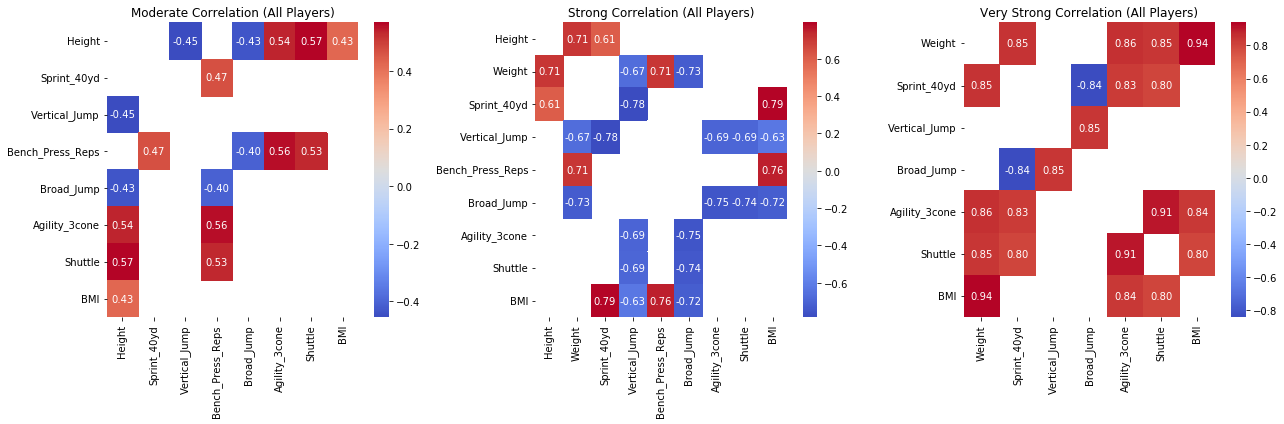

In [345]:
# Set up the figure with three subplots for all players' correlations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Overall players' correlation heatmaps
if not moderate_corr_all.empty:
    sns.heatmap(moderate_corr_all, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
    axes[0].set_title("Moderate Correlation (All Players)")
if not strong_corr_all.empty:
    sns.heatmap(strong_corr_all, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
    axes[1].set_title("Strong Correlation (All Players)")
if not very_strong_corr_all.empty:
    sns.heatmap(very_strong_corr_all, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
    axes[2].set_title("Very Strong Correlation (All Players)")

plt.tight_layout()
plt.show()

### <b> Collinearity Check

In [346]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Assuming df_corr is the original DataFrame with all relevant columns
df_corr = df[["Weight", "Height", "BMI"]]

X = df_corr.dropna()
# Convert to a NumPy array for VIF calculation
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

  feature         VIF
0  Weight  210.043679
1  Height   61.719672
2     BMI  318.176275


In [347]:
df_corr["feature"] = df_corr.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)



ValueError: Length of values (3) does not match length of index (3477)

In [ ]:
# Calculate correlations for all players
overall_corr = df[["Weight", "Vertical_Jump"]].corr()

# Calculate correlations for drafted players
drafted_corr = df[df["Drafted"] == "Yes"][["Weight", "Vertical_Jump"]].corr()

# Calculate correlations for non-drafted players
nondrafted_corr = df[df["Drafted"] == "No"][["Weight", "Vertical_Jump"]].corr()
nondrafted_corr

,Weight,Vertical_Jump
Weight,1.000000,-0.673469
Vertical_Jump,-0.673469,1.000000


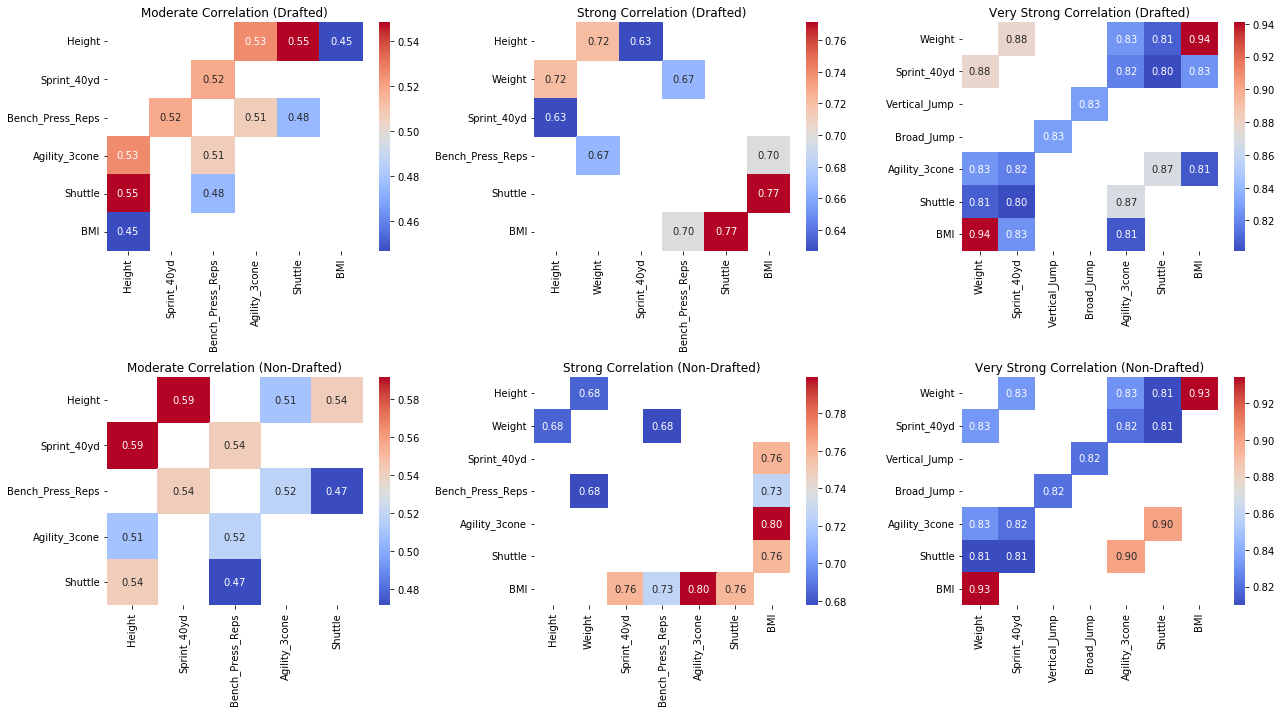

In [ ]:
# Separate the DataFrame based on Drafted status
df_drafted = df[df['Drafted'] == 'Yes'].drop(columns='Drafted')
df_nondrafted = df[df['Drafted'] == 'No'].drop(columns='Drafted')

# Function to calculate and filter correlations
def filter_correlations(df, min_corr, max_corr):
    corr_matrix = df.corr()
    filtered_corr = corr_matrix[(corr_matrix >= min_corr) & (corr_matrix <= max_corr)].dropna(axis=0, how='all').dropna(axis=1, how='all')
    return filtered_corr

# Calculate correlations for each group
moderate_corr_drafted = filter_correlations(df_drafted, 0.4, 0.6)
strong_corr_drafted = filter_correlations(df_drafted, 0.6, 0.8)
very_strong_corr_drafted = filter_correlations(df_drafted, 0.8, 0.99)

moderate_corr_nondrafted = filter_correlations(df_nondrafted, 0.4, 0.6)
strong_corr_nondrafted = filter_correlations(df_nondrafted, 0.6, 0.8)
very_strong_corr_nondrafted = filter_correlations(df_nondrafted, 0.8, 0.99)

# Set up the figure with six subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Drafted players' correlation heatmaps
if not moderate_corr_drafted.empty:
    sns.heatmap(moderate_corr_drafted, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 0])
    axes[0, 0].set_title("Moderate Correlation (Drafted)")
if not strong_corr_drafted.empty:
    sns.heatmap(strong_corr_drafted, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 1])
    axes[0, 1].set_title("Strong Correlation (Drafted)")
if not very_strong_corr_drafted.empty:
    sns.heatmap(very_strong_corr_drafted, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0, 2])
    axes[0, 2].set_title("Very Strong Correlation (Drafted)")

# Non-drafted players' correlation heatmaps
if not moderate_corr_nondrafted.empty:
    sns.heatmap(moderate_corr_nondrafted, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 0])
    axes[1, 0].set_title("Moderate Correlation (Non-Drafted)")
if not strong_corr_nondrafted.empty:
    sns.heatmap(strong_corr_nondrafted, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 1])
    axes[1, 1].set_title("Strong Correlation (Non-Drafted)")
if not very_strong_corr_nondrafted.empty:
    sns.heatmap(very_strong_corr_nondrafted, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 2])
    axes[1, 2].set_title("Very Strong Correlation (Non-Drafted)")

plt.tight_layout()
plt.show()

### <b> Some schools might be have better training facilities and staff and therefore might have a greater chance of having drafter football players.

We might also be interested in looking at the percentage of players which are drafted:

In [ ]:
Drafted_players_by_school.sort_values(by=['count'], ascending=False)

,School,Drafted,count
26,Clemson,Yes,31
113,Ohio St.,Yes,26
114,Oklahoma,Yes,25
68,LSU,Yes,24
142,Stanford,Yes,23
...,...,...,...
74,Louisiana-Lafayette,Yes,1
72,Louisiana,Yes,1
71,Lindenwood,Yes,1
70,Liberty,Yes,1


In [ ]:
Num_player_school = df.groupby(['School','Player']).size().reset_index(name='count')["School"].value_counts()
Num_player_school

Clemson                 31
Ohio St.                26
Oklahoma                25
LSU                     24
Stanford                23
                        ..
Louisiana-Lafayette      1
Louisiana                1
Lindenwood               1
Liberty                  1
Missouri Western St.     1
Name: School, Length: 185, dtype: int64

To identify outliers ze cqn use the z-score as a reference. It is a statistical measure that quantifies the distance between a data point and the mean of a dataset. It's expressed in terms of standard deviations. It indicates how many standard deviations a data point is from the mean of the distribution. A rule of thumb with regards to outliers, is a z-score of 3. Any value with is above or below 3 standard deviation from the mean will be qualified as an outlier in our exploratory analysis. 

Let's look at outlier values for the vertical jump

Drafted_players_by_school = df.groupby(['School','Drafted']).size().reset_index(name='count')


Are there more outliers when players are drafted ? Let's split them into subgroups and compare. Our assumption is that drafted players will tend to have more outliers.

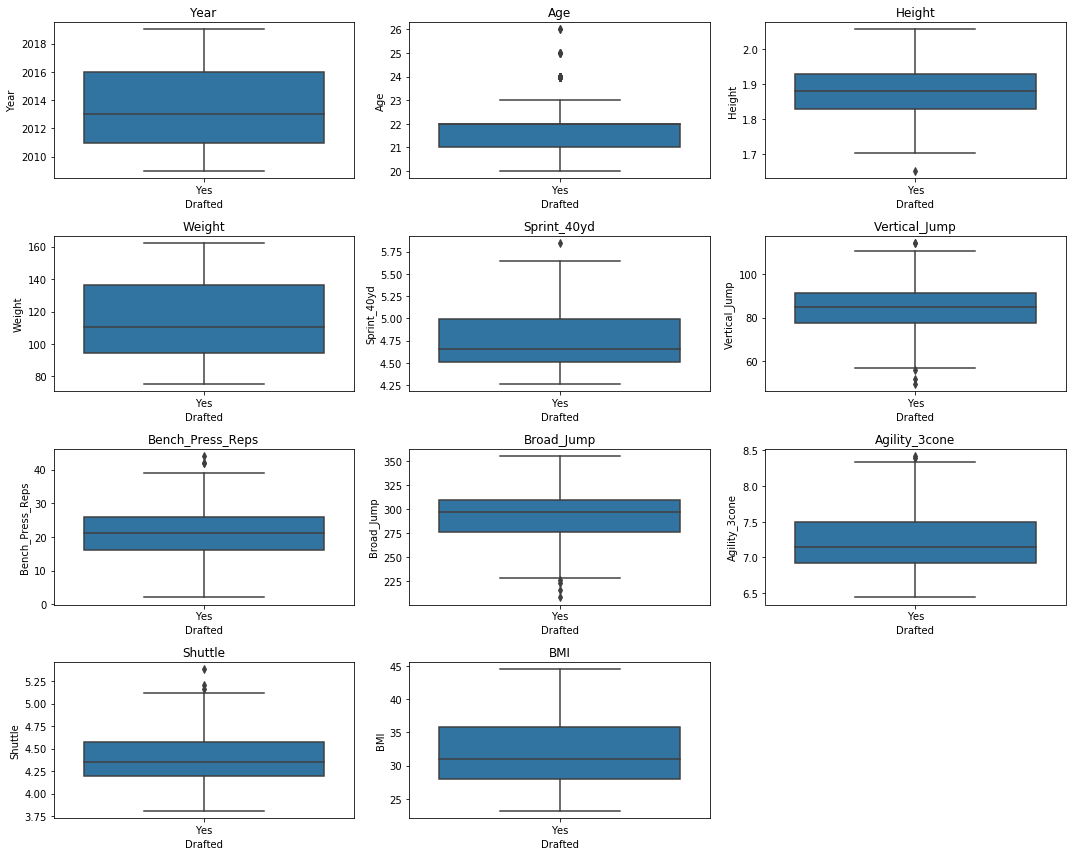

In [ ]:


# Create boxplots for each of the numeric columns, grouped by 'Drafted'
numeric_columns = ['Year', 'Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump',
                   'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create a boxplot for each column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Drafted', y=col, data=df)
    plt.title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Cleaning out columns

In [ ]:
df["Drafted..tm.rnd.yr."]

0        Arizona Cardinals / 1st / 31st pick / 2009
1       Arizona Cardinals / 6th / 204th pick / 2009
2       Arizona Cardinals / 5th / 167th pick / 2009
3        Arizona Cardinals / 3rd / 95th pick / 2009
4        Arizona Cardinals / 2nd / 63rd pick / 2009
                           ...                     
3472                                            NaN
3473                                            NaN
3474                                            NaN
3475                                            NaN
3476                                            NaN
Name: Drafted..tm.rnd.yr., Length: 3477, dtype: object

Let's clean up the formatting for the players.

In [ ]:
df["Player"]

0         Beanie Wells\WellCh00
1           Will Davis\DaviWi99
2       Herman Johnson\JohnHe23
3       Rashad Johnson\JohnRa98
4           Cody Brown\BrowCo96
                 ...           
3472            Xavier Crawford
3473               Jordan Brown
3474           Corey Ballentine
3475                  Ugo Amadi
3476             Nasir Adderley
Name: Player, Length: 3477, dtype: object

Using linear regression to fill in missing values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Identify highly correlated columns
correlation_matrix = df.corr().abs()

# We want to find pairs with a correlation of 70% or more
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] >= 0.7]

# Step 2: Function to predict and fill missing values using multiple explanatory variables
def fill_missing_values_multivariable(df, col_to_fill, explanatory_vars):
    # Separate the data into those with and without missing values
    non_null_df = df[df[col_to_fill].notnull()]
    null_df = df[df[col_to_fill].isnull()]
    
    # If there's no missing value, return the column as is
    if null_df.empty:
        return df[col_to_fill]
    
    # Ensure that we only use explanatory variables that are not null
    explanatory_vars = [var for var in explanatory_vars if var in df.columns and df[var].isnull().sum() == 0]
    
    # Train a linear regression model on non-null data
    X_train = non_null_df[explanatory_vars]
    y_train = non_null_df[col_to_fill]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the missing values
    X_predict = null_df[explanatory_vars]
    y_predict = model.predict(X_predict)
    
    # Fill the missing values with the predictions
    df.loc[df[col_to_fill].isnull(), col_to_fill] = y_predict
    
    return df[col_to_fill]

# Step 3: Apply the model to fill missing values for each column
columns_to_predict = ['Shuttle', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone']

for col in columns_to_predict:
    explanatory_vars = [c for c in columns_to_predict if c != col]
    df[col] = fill_missing_values_multivariable(df, col, explanatory_vars)

# Display the DataFrame after filling missing values
df

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.380000,85.090000,25.000000,325.120000,7.159212,4.356030,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.840000,83.820000,27.000000,292.100000,7.380000,4.450000,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.500000,63.594623,21.000000,245.187710,8.106077,4.950229,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.490000,93.980000,15.000000,304.800000,7.090000,4.230000,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.760000,92.710000,26.000000,304.800000,7.100000,4.400000,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,Xavier Crawford,NaN,Central Michigan,1.8034,84.821773,4.480000,95.250000,11.000000,312.404919,6.806890,4.134933,NaN,26.080939,defense,defensive_back,CB,No
3473,2019,Jordan Brown,NaN,South Dakota St.,1.8288,91.172066,4.510000,100.330000,13.000000,325.120000,6.909651,4.199420,NaN,27.260221,defense,defensive_back,CB,No
3474,2019,Corey Ballentine,NaN,Washburn,1.8034,88.904105,4.470000,100.330000,15.000000,342.900000,6.820000,4.140000,NaN,27.336171,defense,defensive_back,CB,No
3475,2019,Ugo Amadi,NaN,Oregon,1.7526,90.264882,4.510000,82.550000,18.000000,292.100000,7.210000,4.190000,NaN,29.386861,defense,defensive_back,S,No


In [ ]:
correlation_matrix = df.corr().abs()
correlation_matrix

,Year,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI
Year,1.000000,0.100823,0.026368,0.062402,0.029118,0.004539,0.153597,0.143782,0.025600,0.059667,0.094450
Age,0.100823,1.000000,0.107776,0.086786,0.130836,0.108520,0.057550,0.120758,0.073561,0.083433,0.060318
Height,0.026368,0.107776,1.000000,0.709092,0.607029,0.458036,0.350125,0.456682,0.568673,0.578670,0.426552
Weight,0.062402,0.086786,0.709092,1.000000,0.853138,0.664465,0.715261,0.752925,0.867939,0.846021,0.938884
Sprint_40yd,0.029118,0.130836,0.607029,0.853138,1.000000,0.786419,0.526763,0.812852,0.818384,0.804511,0.795063
Vertical_Jump,0.004539,0.108520,0.458036,0.664465,0.786419,1.000000,0.366107,0.817831,0.674672,0.684124,0.625478
Bench_Press_Reps,0.153597,0.057550,0.350125,0.715261,0.526763,0.366107,1.000000,0.478337,0.582026,0.548505,0.755738
Broad_Jump,0.143782,0.120758,0.456682,0.752925,0.812852,0.817831,0.478337,1.000000,0.756601,0.756648,0.740154
Agility_3cone,0.025600,0.073561,0.568673,0.867939,0.818384,0.674672,0.582026,0.756601,1.000000,0.901259,0.833633
Shuttle,0.059667,0.083433,0.578670,0.846021,0.804511,0.684124,0.548505,0.756648,0.901259,1.000000,0.800326


## Feature Engineering 

Only selecting relevant columns for the model

In [ ]:
df = df[['School','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle','Player_Type','Position_Type','Position','Drafted']]

Extracting feature and target arrays based on the dataset. Since our target are players getting drafter we will have it as our target and therefore store it inside of y.

In [ ]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = df.drop('Drafted', axis=1), df[['Drafted']]
# Encoding the target variable
df['Drafted'] = df['Drafted'].map({'yes': 1, 'no': 0})

We will need to change our categorical variables to numerical format to fit the model and therefore we will identify of the comlumsn are categorical.

We identify 4 categorical featues and will encode them as part of the one of the pre processing steps to train the model

In [ ]:
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]
categorical_cols

['School', 'Player_Type', 'Position_Type', 'Position']

Let's also identify the different Numerical columns

We will not need to encode them given the numerical format but we will need to later normalize them as part of one of the pre-processing steps.

In [ ]:
num_cols = [col for col in X.columns if X[col].dtype != "object"]
num_cols

['Year',
 'Age',
 'Height',
 'Weight',
 'Sprint_40yd',
 'Vertical_Jump',
 'Bench_Press_Reps',
 'Broad_Jump',
 'Agility_3cone',
 'Shuttle',
 'BMI']

In [ ]:
mixed_columns = [col for col in X.columns if X[col].dtype == "object" and any (X[col].apply(lambda x:isinstance(x, (float, int))))]

XGBoost has the advantage of internally dealing with categorical variable, so we will leave it out as that. The only requirement is converting the non-numerical variables to "category"

In [ ]:
# Convert to Pandas category
for col in categorical_cols:
   X[col] = X[col].astype('category')


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Drafted  3477 non-null   object
dtypes: object(1)
memory usage: 27.3+ KB


Now we create the Training and testing sets for our model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

XGBoost has its own class for storing datasets calloedf DMatrix, which highly optimizes memory and speed. 

In [ ]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:Drafted

We find a mix of categorical and numerical columns, which is useful for the creation of our model as usually Machine Learning models require label encoding for categorical variable. One particular feature of Xgboost regression is that there is no need for label ofn hot one encoding for categorical variables. This is useful to know and take into account when comparing to other machine learning models.

We have a total of 17 variables. Our target variable is the "Drafter" variable. The other explanatory variables that we are interested in using are the player, the year (some years might have a more competitive draft), the Age (players that are significantly older might tyrouble joining the draft), School (some schools are more competitive or may have better resources for training a player), 40 yard sprint; vertical jump, Bench press reps, BMI, Broad Jump, Player type; Position Type.  